In [1]:
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
# Define input and output folder paths
output_folder = "/Users/favourokpali/Documents/Semester 2/finalProject/output_images/"
input_folder = "/Users/favourokpali/Documents/Semester 2/finalProject/images/"
# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

In [30]:

def enhance_image(image):
    """Enhance image contrast & colors without blurring."""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to only the brightness channel (L)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)

    # Merge and convert back
    enhanced_lab = cv2.merge([l, a, b])
    enhanced_img = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    # Stronger sharpening to make details pop
    sharpen_kernel = np.array([[0, -1, 0], 
                               [-1, 5, -1], 
                               [0, -1, 0]])
    sharp_img = cv2.filter2D(enhanced_img, -1, sharpen_kernel)

    return sharp_img

def boost_colors(image):
    """Boosts red, yellow, green, and blue without affecting other colors."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Increase saturation for better color vibrancy
    h, s, v = cv2.split(hsv)
    s = cv2.add(s, 50)  # Increase saturation (tweak value if needed)
    s = np.clip(s, 0, 255)

    # Merge back & convert to BGR
    boosted_hsv = cv2.merge([h, s, v])
    boosted_img = cv2.cvtColor(boosted_hsv, cv2.COLOR_HSV2BGR)

    return boosted_img

# Process each image in the input folder
os.makedirs(output_folder, exist_ok=True)
for filename in os.listdir(input_folder):
    if filename.endswith((".png", ".jpg", ".jpeg")):
        image_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        # Load the image
        image = cv2.imread(image_path)
        extracted_signs = boost_colors(image)
        # Enhance the extracted sign area
        enhanced_signs = enhance_image(extracted_signs)
        # Apply edge detection for better visibility
        edges = cv2.Canny(enhanced_signs, 50, 150)
        edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
        final_output = cv2.addWeighted(enhanced_signs, 0.9, edges_colored, 0.1, 0)
        # Save the processed image
        cv2.imwrite(output_path, final_output)
print("Processing completed. Enhanced images saved in:", output_folder)

Processing completed. Enhanced images saved in: /Users/favourokpali/Documents/Semester 2/finalProject/output_images/


/Users/favourokpali/Documents/Semester 2/finalProject/output_images/road264.png
/Users/favourokpali/Documents/Semester 2/finalProject/output_images/road728.png
/Users/favourokpali/Documents/Semester 2/finalProject/output_images/road714.png
/Users/favourokpali/Documents/Semester 2/finalProject/output_images/road700.png


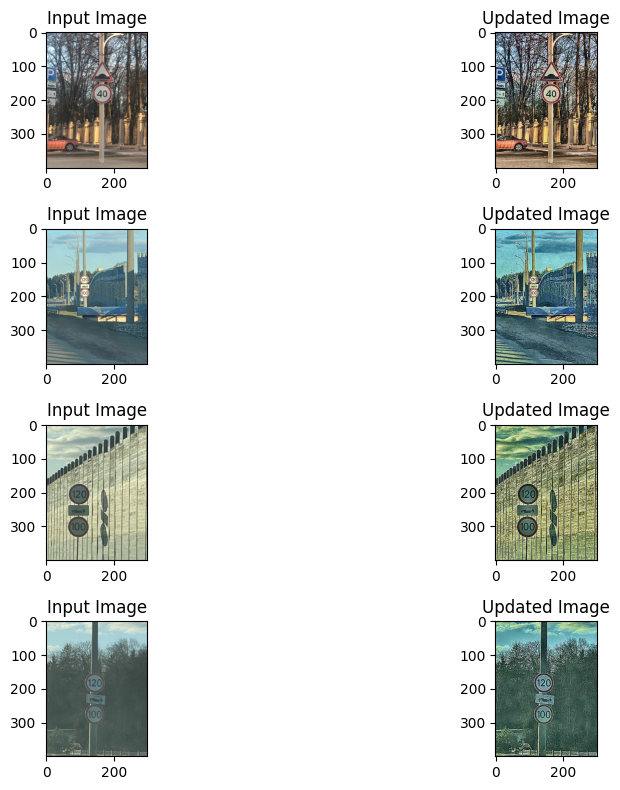

In [31]:
# Number of samples to display
num_samples = 4

# Get the first 'num_samples' image names
image_names = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))][100:104]

# Create subplots
fig, axes = plt.subplots(num_samples, 2, figsize=(12, 2 * num_samples))

# Loop through selected images
for i, image_name in enumerate(image_names):
    image_path = os.path.join(input_folder, image_name)
    updated_image_path = os.path.join(output_folder, image_name)
    print(updated_image_path)
    
    # Read the image
    image = mpimg.imread(image_path)
    updated_image = mpimg.imread(updated_image_path)
    
    # Display Input Image
    axes[i, 0].imshow(image)
    axes[i, 0].set_title("Input Image")

    # Display Updated Image (Modify this if needed)
    axes[i, 1].imshow(updated_image)  # Replace with processed image
    axes[i, 1].set_title("Updated Image")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()
